# Pipeline Activation

## Setup

First, login information. If you are don't have your login information, contact the administrator. To set this information, you can
1. One can either change to a directory with a local config file `dj_local_conf.json`, example below.
2. Set these permissions on a machine globally (see [documentation](https://docs.datajoint.org/python/v0.13/setup/01-Install-and-Connect.html))
3. Set these values for each session.

Example local config:
```json
{
    "database.host": "host",
    "database.password": "pass",
    "database.user": "USER",
    "database.port": 3306,
    "database.reconnect": true,
    "connection.init_function": null,
    "connection.charset": "",
    "loglevel": "INFO",
    "safemode": true,
    "fetch_format": "array",
    "display.limit": 12,
    "display.width": 14,
    "display.show_tuple_count": true,
    "database.use_tls": null,
    "enable_python_native_blobs": true,
    "database.ingest_filename_short": "",
    "database.ingest_filename_full": "",
    "custom": {
        "database.prefix": "adamacs_",
        "dlc_root_data_dir": [
            "/My/Local/Dir1",
            "/My/Local/Dir2"
        ],
        "dlc_output_dir": "/My/Local/Dir3/optional",
        "imaging_root_data_dir" : [
            "/My/Local/Dir4",
            "/My/Local/Dir5"
        ],
        "pyrat_user_token": "token",
        "pyrat_client_token": "token"
    }
}

```

Move to detect local config:

In [1]:
import datajoint as dj
dj.config

{   'connection.charset': '',
    'connection.init_function': None,
    'database.host': 'localhost',
    'database.password': None,
    'database.port': 3306,
    'database.reconnect': True,
    'database.use_tls': None,
    'database.user': None,
    'display.limit': 12,
    'display.show_tuple_count': True,
    'display.width': 14,
    'enable_python_native_blobs': True,
    'fetch_format': 'array',
    'loglevel': 'INFO',
    'safemode': True}

In [3]:
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

DataJoint connection (disconnected) root@172.26.128.53:3306

Alternatively, set login information during this session:

In [1]:
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'
dj.config['database.user'] = 'danielmk'
dj.config['database.password'] = getpass.getpass() # enter the password securily
dj.conn()

········
Connecting danielmk@172.26.128.53:3306


DataJoint connection (connected) danielmk@172.26.128.53:3306

## Activation

Next, activate the schema. 

`adamacs/pipeline.py` includes all the pieces required to activate the whole pipeline via import.

In [4]:
from adamacs.pipeline import subject, session, surgery, session, behavior, equipment, \
                             imaging, scan, train, model

C:\Programs\envs\datajoint3\lib\site-packages\datajoint\connection.py:342: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


To visualize the pipeline, we can generate diagrams for any combination of schemas.

In [5]:
dj.Diagram(session) + dj.Diagram(subject)

FileNotFoundError: [WinError 2] "dot" not found in path.

In [4]:
dj.Diagram(subject) + dj.Diagram(behavior) 

FileNotFoundError: [WinError 2] "dot" not found in path.

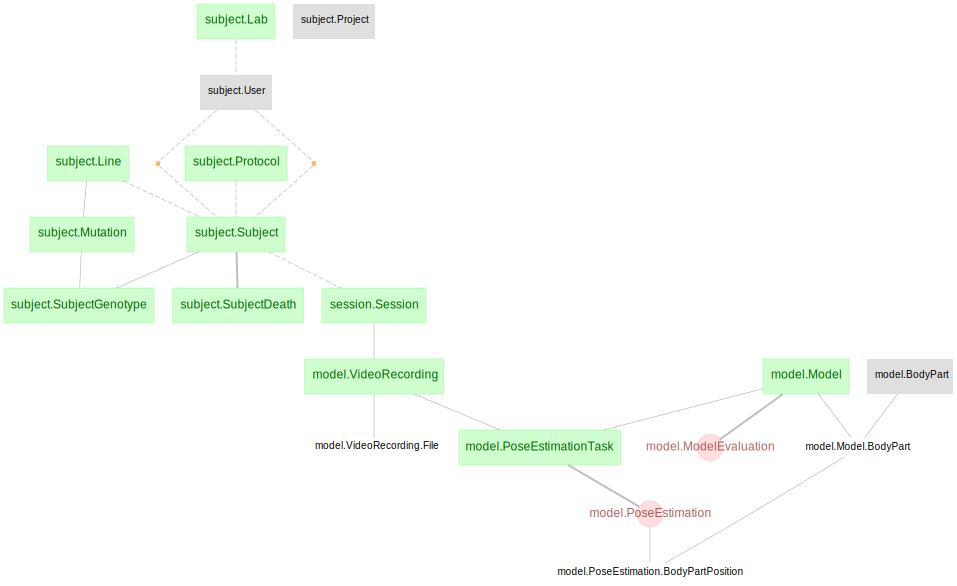

In [6]:
dj.Diagram(subject) + dj.Diagram(model)

subject ID,lab short lab name,earmark aka lab_id,sex Geschlecht,birth_date Geb.,subject_description,generation Generation (F2 in example sheet),owner Besitzer,responsible Verantwortlicher,line,user,project,protocol
